<a href="https://colab.research.google.com/github/Skamath3/testrepo/blob/main/Media_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,0,2018-03-13 08:41:28 UTC,2018-04-14 00:00:00 UTC,SB11210326209662973945104584092013974171076,WSJ_Business,Theo+Francis,WSJ_Article_Business_Are You Underpaid? In a F...,ceo|ceo to median pay ratio|compensation|dariu...,3,1269.0,0.0
1,1,2018-03-14 08:21:54 UTC,NaN,SB11704195083378974371404584099570957708050,WSJ_Business,Paul Ziobro,WSJ_Article_Business_Drones Are Watching: Rail...,data|drone|drones|employee|employer|employers|...,1,917.0,0.0
2,2,2018-03-13 06:18:59 UTC,NaN,SB12775101498795324251604584089331231148204,WSJ_Opinion,Francesco Ronchi,WSJ_Article_Commentary (U.S.)_Italian Voters D...,5-star movement| election|italy| populism| the...,1,895.0,0.0
3,3,2018-03-15 14:18:43 UTC,NaN,SB11027093093037343542404584101860399949656,WSJ_Business,Tim+Higgins,WSJ_Article_Autos_Tesla’s Make-Or-Break Moment...,elon musk |tesla|tesla cash burn|tesla debt|te...,1,951.0,0.0
4,4,2018-03-16 12:56:19 UTC,NaN,SB11027093093037343542404584103340219066918,WSJ_Markets,Laura+Saunders,WSJ_Article_Tax Report_Do You Own Bitcoin? The...,asset|bitcoin|capital gains |coinbase|cryptocu...,1,903.0,1.0


In [ ]:
df.isnull()

,customerID,firstVisitDate,secondVisitDate,articleID,section,author,headline,topicKeywords,totalVisits,wordCount,videoCount
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,True,False,False,False,False,False,False,False,False
9996,False,False,True,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

customerID            0
firstVisitDate        0
secondVisitDate    8797
articleID             0
section               0
author              101
headline              0
topicKeywords         1
totalVisits           0
wordCount           402
videoCount          402
dtype: int64

In [ ]:
len_firstVisitDate = len(df['firstVisitDate'])
len_firstVisitDate

10000

In [ ]:
df = df.dropna(axis=0,subset = ['secondVisitDate'])

In [ ]:
df.isnull().sum()

customerID          0
firstVisitDate      0
secondVisitDate     0
articleID           0
section             0
author             18
headline            0
topicKeywords       0
totalVisits         0
wordCount          33
videoCount         33
dtype: int64

In [ ]:
len_secondVisitDate = len(df['secondVisitDate'])
len_secondVisitDate

1203

In [ ]:
percentage_secondtimevisitor = (len_secondVisitDate/len_firstVisitDate)*100
percentage_secondtimevisitor    
#Q.1 What Percentage Of Customers returned after first visit = 12.03%

12.030000000000001

In [ ]:
section = df.section.unique()
section #finding sections in dataset 

array(['WSJ_Business', 'WSJ_Politics', 'WSJ_Opinion', 'WSJ_Tech',
       'WSJ_Markets', 'WSJ_Life'], dtype=object)

In [ ]:
for section_value in section: 
  section_Business = df.loc[df ['section']== section_value ]
  group = section_Business.groupby('articleID')
  df2 = section_Business.groupby(['articleID']).totalVisits.sum().reset_index()
  df2.sort_values(by=['totalVisits'],ascending= False, inplace= True)
  abc = "For  " + section_value + ",  " + df2[0:3].astype(str)
  print (abc)
  
#Q.2.Top 3 best-performing stories in each section, by page views


                                            articleID              totalVisits
54  For  WSJ_Business,  SB117041950833789743714045...  For  WSJ_Business,  350
36  For  WSJ_Business,  SB110366904207877746660045...   For  WSJ_Business,  93
2   For  WSJ_Business,  SB103422412676094847177045...   For  WSJ_Business,  70
                                            articleID              totalVisits
1   For  WSJ_Politics,  SB100537212538264743268045...  For  WSJ_Politics,  624
23  For  WSJ_Politics,  SB112103262096629739451045...  For  WSJ_Politics,  455
35  For  WSJ_Politics,  SB117041950833789743714045...  For  WSJ_Politics,  229
                                            articleID             totalVisits
15  For  WSJ_Opinion,  SB1038528721637988454870458...  For  WSJ_Opinion,  124
12  For  WSJ_Opinion,  SB1034224126760948471770458...   For  WSJ_Opinion,  81
28  For  WSJ_Opinion,  SB1151326079564025455800458...   For  WSJ_Opinion,  76
                                            articleID   

In [ ]:
df3 = df.groupby(['section']).totalVisits.sum().reset_index()
df3.sort_values(by=['totalVisits'],ascending= True, inplace= True)
df3

,section,totalVisits
5,WSJ_Tech,331
2,WSJ_Markets,411
1,WSJ_Life,505
3,WSJ_Opinion,718
0,WSJ_Business,1372
4,WSJ_Politics,2106


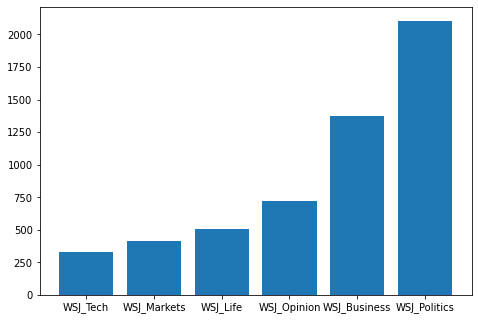

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(df3['section'], df3['totalVisits'])
plt.show()

In [ ]:
df4 = df.groupby(['author']).totalVisits.sum().reset_index()
df4.sort_values(by=['totalVisits'],ascending= False, inplace= True)
df4 = df4[0:10]
df4

,author,totalVisits
176,Michael C. Bender,437
219,Rebecca Ballhaus|Peter Nicholas,371
183,Michael+C.+Bender,353
138,Khadeeja Safdar,310
267,The Editorial Board,287
179,Michael C. Bender|Rebecca Ballhaus,169
139,Khadeeja+Safdar,97
222,Rebecca+Ballhaus,89
214,Rebecca Ballhaus,77
177,Michael C. Bender|Felicia Schwartz,76


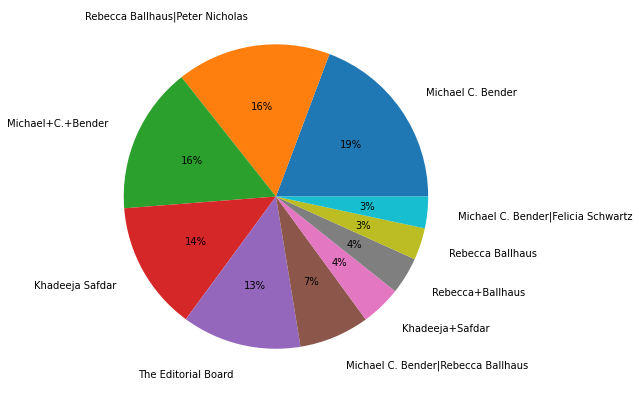

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.pie(df4['totalVisits'], labels=df4['author'], autopct='%1.0f%%',labeldistance=1.2)
plt.show()